In [1]:
from sampler import *
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D

seed = 123
np.random.seed(seed)

Now we run the sampler for the same SLDS model with data from a Lorenz system. First laod the data.

In [2]:
x_lorenz = np.load('./simulation/x_lorenz.npy')
D,T = x_lorenz.shape

We start with $K=3$. Let's pick a sample from the tail of the sampler chain, and plot, for instance, the sampled sequence $z_t$.

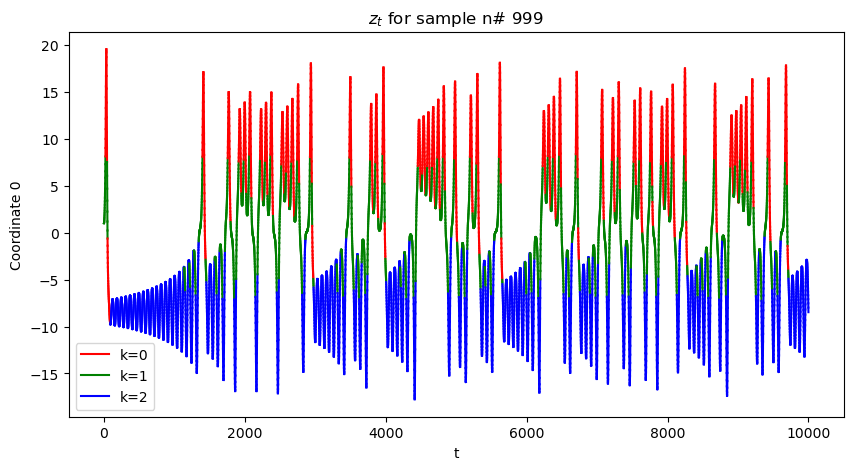

In [58]:
K=3
n_iterations = 1000
samples = sample(n_iterations,K,x_lorenz,seed=seed)

fig, ax = plt.subplots(figsize=[10,5])
coordinate = 0

# let's grab one of the last samples, that supposedly are updated with a good PI
sample = 999

cmap = get_cmap('viridis')
t = np.arange(0,T)
z = samples["z"][sample]






colors=['r','g','b']
for i in range(T-1):
    # z_i is the state used to generate i+1
    z_i = samples["z"][sample][i]
    ax.plot((i,i+1),x_lorenz[0,i:i+2],color=colors[z_i])


custom_lines = [Line2D([0],[0],color=colors[i]) for i in range(K)]
ax.set_title("$z_t$ for sample n# {}".format(sample))
ax.set_ylabel('Coordinate {}'.format(coordinate))
ax.set_xlabel('t')
ax.legend(custom_lines, ['k={}'.format(i) for i in range(K)])

It looks like the model manages to cluster the two attractor in two separate linear approximations. Let's see what happens if we vary the number $K$ of states.

In [ ]:
K_in = 2
K_fin = 5


n_iterations = 1000
n_sample = 999

samples = []

for K in range(K_in,K_fin):

    # ============== SAMPLING

    samples.append( sample(n_iterations,K,x_lorenz,seed=seed) )


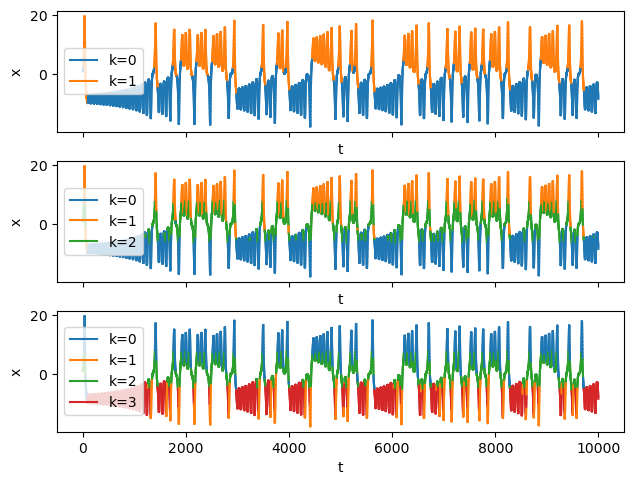

In [36]:
# ============== PLOTTING
fig,axs = plt.subplots(K_fin-K_in,sharex=True)
fig.tight_layout()
coordinates = ['x','y','z']
coordinate = 0

# get the default colors cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for K in range(K_in,K_fin):
    
    for i in range(T-1):
        # z_i is the state used to generate i+1
        z_i = samples[K-K_in]["z"][n_sample][i]
        axs[K-K_in].plot((i,i+1),x_lorenz[0,i:i+2],color=colors[z_i])

    custom_lines = [Line2D([0],[0],color=colors[i]) for i in range(K)]
    axs[K-K_in].set_ylabel(coordinates[coordinate])
    axs[K-K_in].set_xlabel('t')
    axs[K-K_in].legend(custom_lines, ['k={}'.format(i) for i in range(K)],loc='center left')